<a href="https://colab.research.google.com/github/GreeshmaHarids/puthon_class/blob/main/nlp_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [ ]:
df=pd.read_csv("/content/SMS_train (1).csv",encoding='ISO-8859-1')
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam


In [ ]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df.tail()

,S. No.,Message_body,Label
952,953,hows my favourite person today? r u workin har...,Non-Spam
953,954,How much you got for cleaning,Non-Spam
954,955,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,956,Wat time ü finish?,Non-Spam
956,957,Just glad to be talking to you.,Non-Spam


In [ ]:
df.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [ ]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [ ]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df['Label'].value_counts()

Non-Spam    835
Spam        122
Name: Label, dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

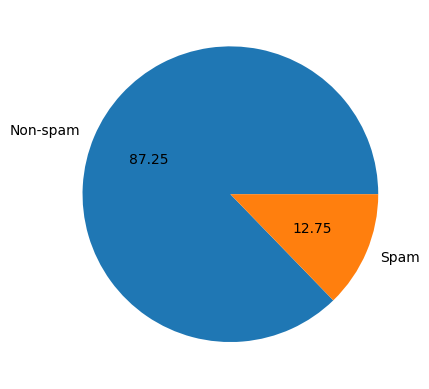

In [ ]:
x=df['Label'].value_counts()
plt.pie(x,labels=['Non-spam','Spam'],autopct='%.2f')
plt.legend

<Axes: xlabel='Label', ylabel='count'>

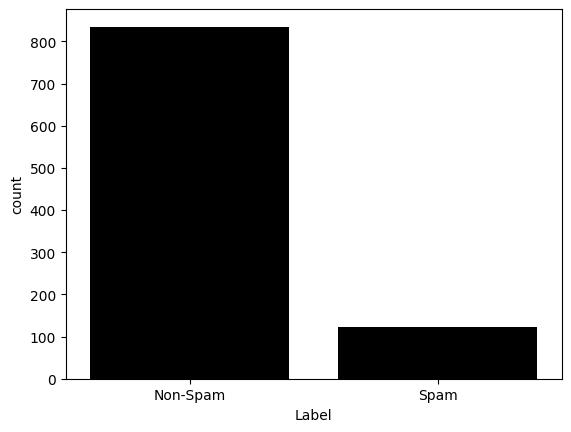

In [ ]:
sns.countplot(x='Label',data=df,color='k')

In [ ]:
df['Label'].unique()

array(['Non-Spam', 'Spam'], dtype=object)

In [ ]:
df.drop(['S. No.'],axis=1)

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
952,hows my favourite person today? r u workin har...,Non-Spam
953,How much you got for cleaning,Non-Spam
954,Sorry da. I gone mad so many pending works wha...,Non-Spam
955,Wat time ü finish?,Non-Spam


In [ ]:
df['Label']=df['Label'].map({'Non-Spam':1,'Spam':0})
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,1
1,2,The guy did some bitching but I acted like i'd...,1
2,3,"Pity, * was in mood for that. So...any other s...",1
3,4,Will ü b going to esplanade fr home?,1
4,5,This is the 2nd time we have tried 2 contact u...,0
...,...,...,...
952,953,hows my favourite person today? r u workin har...,1
953,954,How much you got for cleaning,1
954,955,Sorry da. I gone mad so many pending works wha...,1
955,956,Wat time ü finish?,1


In [ ]:
df.dtypes

S. No.           int64
Message_body    object
Label            int64
dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
msg=df.Message_body
msg

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today? r u workin har...
953                        How much you got for cleaning
954    Sorry da. I gone mad so many pending works wha...
955                                   Wat time ü finish?
956                      Just glad to be talking to you.
Name: Message_body, Length: 957, dtype: object

In [ ]:
#tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
msg=msg.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))
msg

0                            Rofl . Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity , * was in mood for that . So ... any oth...
3                  Will ü b going to esplanade fr home ?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today ? r u workin ha...
953                        How much you got for cleaning
954    Sorry da . I gone mad so many pending works wh...
955                                  Wat time ü finish ?
956                     Just glad to be talking to you .
Name: Message_body, Length: 957, dtype: object

In [ ]:
#removing special characters
msg=msg.str.replace('[^a-zA-z0-9]+',' ')
msg

<ipython-input-310-299e41b5c6f2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  msg=msg.str.replace('[^a-zA-z0-9]+',' ')


0                              Rofl Its true to its name
1      The guy did some bitching but I acted like i d...
2      Pity was in mood for that So any other suggest...
3                     Will b going to esplanade fr home 
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today r u workin hard...
953                        How much you got for cleaning
954    Sorry da I gone mad so many pending works what...
955                                     Wat time finish 
956                      Just glad to be talking to you 
Name: Message_body, Length: 957, dtype: object

In [ ]:
#removing words less than length 3
from nltk.tokenize import word_tokenize
msg=msg.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
msg

0                                 Rofl Its true its name
1      The guy did some bitching but acted like inter...
2           Pity was mood for that any other suggestions
3                              Will going esplanade home
4      This the 2nd time have tried contact have won ...
                             ...                        
952    hows favourite person today workin hard couldn...
953                        How much you got for cleaning
954               Sorry gone mad many pending works what
955                                      Wat time finish
956                                Just glad talking you
Name: Message_body, Length: 957, dtype: object

In [ ]:
#stemming
from nltk.stem import SnowballStemmer
sn=SnowballStemmer('english')
msg=msg.apply(lambda x:[sn.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
msg

0                                   rofl it true it name
1      the guy did some bitch but act like interest b...
2               piti was mood for that ani other suggest
3                                  will go esplanad home
4      this the 2nd time have tri contact have won th...
                             ...                        
952    how favourit person today workin hard couldn s...
953                           how much you got for clean
954                   sorri gone mad mani pend work what
955                                      wat time finish
956                                   just glad talk you
Name: Message_body, Length: 957, dtype: object

In [ ]:
#stopwords
from nltk.corpus import stopwords
st=stopwords.words('english')
msg=msg.apply(lambda x:[i for i in tk.tokenize(x) if i not in st]).apply(lambda x:' '.join(x))
msg

0                                         rofl true name
1      guy bitch act like interest buy someth els nex...
2                                  piti mood ani suggest
3                                       go esplanad home
4      2nd time tri contact 750 pound prize claim eas...
                             ...                        
952    favourit person today workin hard sleep last n...
953                                       much got clean
954                        sorri gone mad mani pend work
955                                      wat time finish
956                                            glad talk
Name: Message_body, Length: 957, dtype: object

In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(msg)
train_data

<957x2534 sparse matrix of type '<class 'numpy.float64'>'
	with 7358 stored elements in Compressed Sparse Row format>

In [ ]:
df1=pd.read_csv("/content/SMS_test (2).csv",encoding='ISO-8859-1')

In [ ]:
df1.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [ ]:
df1.tail()

,S. No.,Message_body,Label
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
124,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [ ]:
df1.dtypes

S. No.           int64
Message_body    object
Label           object
dtype: object

In [ ]:
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [ ]:
df1.Label.value_counts()

Spam        76
Non-Spam    49
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

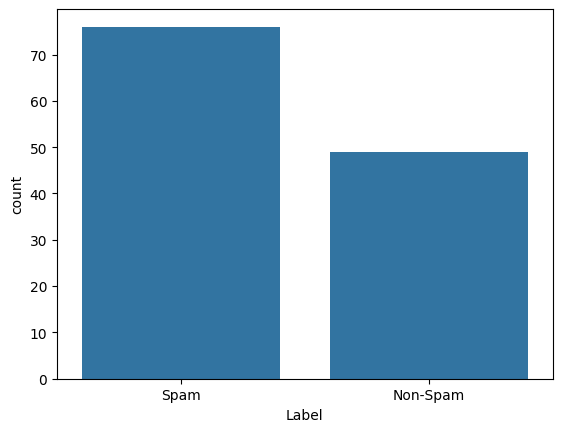

In [ ]:
sns.countplot(x=df1.Label,data=df)

In [ ]:
df1.Label.unique()

array(['Spam', 'Non-Spam'], dtype=object)

In [ ]:
df1.drop(['S. No.'],axis=1,inplace=True)

In [ ]:
df1['Label']=df1['Label'].map({'Spam':0,'Non-Spam':1})
df1

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",0
1,"Loan for any purpose £500 - £75,000. Homeowner...",0
2,Congrats! Nokia 3650 video camera phone is you...,0
3,URGENT! Your Mobile number has been awarded wi...,0
4,Someone has contacted our dating service and e...,0
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,1
121,Try to do something dear. You read something f...,1
122,Sun ah... Thk mayb can if dun have anythin on....,1
123,"SYMPTOMS when U are in love: ""1.U like listeni...",1


In [ ]:
df1.dtypes

Message_body    object
Label            int64
dtype: object

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
msg1=df1.Message_body
msg1

0      UpgrdCentre Orange customer, you may now claim...
1      Loan for any purpose £500 - £75,000. Homeowner...
2      Congrats! Nokia 3650 video camera phone is you...
3      URGENT! Your Mobile number has been awarded wi...
4      Someone has contacted our dating service and e...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear. You read something f...
122    Sun ah... Thk mayb can if dun have anythin on....
123    SYMPTOMS when U are in love: "1.U like listeni...
124    Great. Have a safe trip. Dont panic surrender ...
Name: Message_body, Length: 125, dtype: object

In [ ]:
#tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
msg1=msg1.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))
msg1

0      UpgrdCentre Orange customer , you may now clai...
1      Loan for any purpose £ 500 - £ 75,000 . Homeow...
2      Congrats ! Nokia 3650 video camera phone is yo...
3      URGENT ! Your Mobile number has been awarded w...
4      Someone has contacted our dating service and e...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear . You read something ...
122    Sun ah ... Thk mayb can if dun have anythin on...
123    SYMPTOMS when U are in love : " 1 . U like lis...
124    Great . Have a safe trip . Dont panic surrende...
Name: Message_body, Length: 125, dtype: object

In [ ]:
#removing special characters
msg1=msg1.str.replace('[^a-zA-z0-9]+',' ')
msg1

<ipython-input-329-2d99bf5fc490>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  msg1=msg1.str.replace('[^a-zA-z0-9]+',' ')


0      UpgrdCentre Orange customer you may now claim ...
1      Loan for any purpose 500 75 000 Homeowners Ten...
2      Congrats Nokia 3650 video camera phone is your...
3      URGENT Your Mobile number has been awarded wit...
4      Someone has contacted our dating service and e...
                             ...                        
120    7 wonders in My WORLD 7th You 6th Ur style 5th...
121    Try to do something dear You read something fo...
122    Sun ah Thk mayb can if dun have anythin on Thk...
123    SYMPTOMS when U are in love 1 U like listening...
124     Great Have a safe trip Dont panic surrender all 
Name: Message_body, Length: 125, dtype: object

In [ ]:
#removing words less than length 3
from nltk.tokenize import word_tokenize
msg1=msg1.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
msg1

0      UpgrdCentre Orange customer you may now claim ...
1      Loan for any purpose 500 000 Homeowners Tenant...
2      Congrats Nokia 3650 video camera phone your Ca...
3      URGENT Your Mobile number has been awarded wit...
4      Someone has contacted our dating service and e...
                             ...                        
120    wonders WORLD 7th You 6th style 5th smile 4th ...
121      Try something dear You read something for exams
122    Sun Thk mayb can dun have anythin Thk have boo...
123    SYMPTOMS when are love like listening songs ge...
124        Great Have safe trip Dont panic surrender all
Name: Message_body, Length: 125, dtype: object

In [ ]:
#stemming
from nltk.stem import SnowballStemmer
sn=SnowballStemmer('english')
msg1=msg1.apply(lambda x:[sn.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
msg1

0      upgrdcentr orang custom you may now claim your...
1      loan for ani purpos 500 000 homeown tenant wel...
2      congrat nokia 3650 video camera phone your cal...
3      urgent your mobil number has been award with 2...
4      someon has contact our date servic and enter y...
                             ...                        
120    wonder world 7th you 6th style 5th smile 4th p...
121             tri someth dear you read someth for exam
122    sun thk mayb can dun have anythin thk have boo...
123    symptom when are love like listen song get sto...
124          great have safe trip dont panic surrend all
Name: Message_body, Length: 125, dtype: object

In [ ]:
#stopwords
from nltk.corpus import stopwords
st=stopwords.words('english')
msg1=msg1.apply(lambda x:[i for i in tk.tokenize(x) if i not in st]).apply(lambda x:' '.join(x))
msg1

0      upgrdcentr orang custom may claim free camera ...
1      loan ani purpos 500 000 homeown tenant welcom ...
2      congrat nokia 3650 video camera phone call 090...
3      urgent mobil number award 2000 prize guarante ...
4      someon contact date servic enter phone becaus ...
                             ...                        
120    wonder world 7th 6th style 5th smile 4th perso...
121                     tri someth dear read someth exam
122    sun thk mayb dun anythin thk book lesson pilat...
123    symptom love like listen song get stop see nam...
124                   great safe trip dont panic surrend
Name: Message_body, Length: 125, dtype: object

In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
test_data=vec.fit_transform(msg1)
test_data

<125x858 sparse matrix of type '<class 'numpy.float64'>'
	with 1566 stored elements in Compressed Sparse Row format>

In [ ]:
y_train=df['Label']
y_train.shape

(957,)

In [ ]:
y_test=df1['Label']
y_test.shape

(125,)

In [ ]:
train_data.shape

(957, 2534)

In [ ]:
test_data.shape

(125, 858)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# k=KNeighborsClassifier()
m=MultinomialNB()
s=SVC()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
lst=[m,s,d,r]
for i in lst:
  print("Classifier is :\n",i)
  i.fit(train_data,y_train)
  y_pred=i.predict(test_data)
  print("Accuracy score:\n",accuracy_score(y_test,y_pred))

Classifier is :
 MultinomialNB()


ValueError: X has 858 features, but MultinomialNB is expecting 2534 features as input.